In [1]:
!pwd
#/tf/capstone2/src

/tf/capstone2/src


In [2]:
from image_pipeline import *
from bc import *

In [3]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [4]:
def get_images(): 
    
    '''
    (that I want)
    Input: None
    Output: Dictionary of resized images

    Read in 4 images from the data folder nad output them for later use. 
    '''

    first   = imread('../breastcancerslides.png')
    second = imread('../breastcancerslides.png')
    #female = imread('../data/female.jpg')
    #forest = imread('../data/forest.jpg')
    #beach  = imread('../data/beach.jpg')

    imgs =  {'Male': first, 'Female': second}
    for k, v in imgs.items(): 
        imgs[k] = resize(v, (300, 300))

    return imgs

In [5]:
#imgs = get_images()


In [6]:
root_dir = '../data/BreaKHis_v1/histology_slides/breast'
image_size = (200, 300, 3)

ip = read_images(root_dir)
ip.resize(shape = image_size)

Invalid sub_dirs data type: <class 'list'>. List expected
root dir ../data/BreaKHis_v1/histology_slides/breast
traverse ../data/BreaKHis_v1/histology_slides/breast	 ['benign', 'malignant']	 3
fldr ['breast']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name breast w subdirs list ['40X']
compare dir_name breast w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign	 ['SOB']	 7
fldr ['benign']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name benign w subdirs list ['40X']
compare dir_name benign w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB	 ['adenosis', 'fibroadenoma', 'phyllodes_tumor', 'tubular_adenoma']	 1
fldr ['SOB']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB w subdirs list ['40X']
compare dir_name SOB w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis	 ['SOB_B_A_14-22549AB', 'SOB_B_A_14-22549CD', 'SOB_B_A_14-22549G', 'SOB_B_A_14-29960CD']	 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_B_F_14-23060AB']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_B_F_14-23060AB w subdirs list ['40X']
compare dir_name SOB_B_F_14-23060AB w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/100X	 []	 22
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/200X	 []	 18
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-23060AB/400X	 []	 18
fldr ['400X']
raw sd names ['40X'] and data type <class 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma	 ['SOB_B_TA_14-13200', 'SOB_B_TA_14-15275', 'SOB_B_TA_14-16184', 'SOB_B_TA_14-16184CD', 'SOB_B_TA_14-19854C', 'SOB_B_TA_14-21978AB', 'SOB_B_TA_14-3411F']	 0
fldr ['tubular_adenoma']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name tubular_adenoma w subdirs list ['40X']
compare dir_name tubular_adenoma w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_B_TA_14-13200']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_B_TA_14-13200 w subdirs list ['40X']
compare dir_name SOB_B_TA_14-13200 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/benign/SOB/tubular_adenoma/SOB_B_TA_14-13200/100X	 []	 14
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
tra

traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/200X	 []	 24
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/400X	 []	 23
fldr ['400X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 400X w subdirs list ['40X']
compare dir_name 400X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/40X	 []	 25
fldr ['40X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 40X w subdirs list ['40X']
compare dir_name 40X w ea sd 40X
valid subdir 40X
image name 0 ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11520/40X/SOB_M_DC-14-11520-40-001.png
len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/maligna

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-15696']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-15696 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-15696 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/100X	 []	 23
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/200X	 []	 22
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-15696/400X	 []	 15
fldr ['400X']
raw sd names ['40X'] 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-17614']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-17614 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-17614 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/100X	 []	 29
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/200X	 []	 33
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-17614/400X	 []	 28
fldr ['400X']
raw sd names ['40X'] 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-2980']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-2980 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-2980 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/100X	 []	 25
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/200X	 []	 21
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2980/400X	 []	 18
fldr ['400X']
raw sd names ['40X'] and dat

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_DC_14-6241']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_DC_14-6241 w subdirs list ['40X']
compare dir_name SOB_M_DC_14-6241 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/100X	 []	 21
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/200X	 []	 12
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-6241/400X	 []	 13
fldr ['400X']
raw sd names ['40X'] and dat

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_MC_14-12773']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_MC_14-12773 w subdirs list ['40X']
compare dir_name SOB_M_MC_14-12773 w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/100X	 []	 25
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/200X	 []	 21
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-12773/400X	 []	 18
fldr ['400X']
raw sd names 

len img_lst 1
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B	 ['100X', '200X', '400X', '40X']	 0
fldr ['SOB_M_PC_14-15687B']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name SOB_M_PC_14-15687B w subdirs list ['40X']
compare dir_name SOB_M_PC_14-15687B w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/100X	 []	 16
fldr ['100X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 100X w subdirs list ['40X']
compare dir_name 100X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/200X	 []	 14
fldr ['200X']
raw sd names ['40X'] and data type <class 'list'>
compare dir_name 200X w subdirs list ['40X']
compare dir_name 200X w ea sd 40X
traverse ../data/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_14-15687B/400X	 []	 15
fldr ['400X']
ra

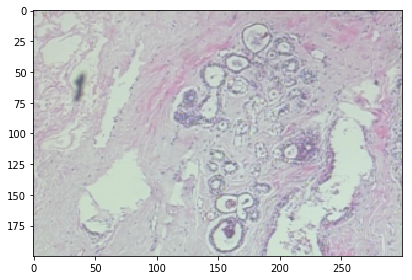

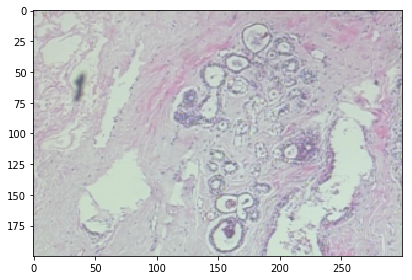

In [7]:
img1 = ip.get_image(0, 0)
io.imshow(img1)

In [8]:
#imgs.keys()

In [9]:
#plot_images(imgs, save_title='question2.png', show = True)

In [10]:
ip.vectorize()
ip.vectorize_y() 
ip.img_attribs

img_lst2 len 82 should be 1  1 1
len of sub list 0 2 1
len of sub list 1 2 1
len of sub list 2 2 1
len of sub list 3 2 1
len of sub list 4 2 1
len of sub list 5 2 1
len of sub list 6 2 1
len of sub list 7 2 1
len of sub list 8 2 1
len of sub list 9 2 1
len of sub list 10 2 1
len of sub list 11 2 1
len of sub list 12 2 1
len of sub list 13 2 1
len of sub list 14 2 1
len of sub list 15 2 1
len of sub list 16 2 1
len of sub list 17 2 1
len of sub list 18 2 1
len of sub list 19 2 1
len of sub list 20 2 1
len of sub list 21 2 1
len of sub list 22 2 1
len of sub list 23 2 1
len of sub list 24 2 1
len of sub list 25 2 1
len of sub list 26 2 1
len of sub list 27 2 1
len of sub list 28 2 1
len of sub list 29 2 1
len of sub list 30 2 1
len of sub list 31 2 1
len of sub list 32 2 1
len of sub list 33 2 1
len of sub list 34 2 1
len of sub list 35 2 1
len of sub list 36 2 1
len of sub list 37 2 1
len of sub list 38 2 1
len of sub list 39 2 1
len of sub list 40 2 1
len of sub list 41 2 1
len of sub 

{'SOB_B_A-14-22549AB-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '22549AB',
  'tumor_class': 'B',
  'tumor_type': 'SOB_B_A',
  'year': '14'},
 'SOB_B_A-14-22549CD-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '22549CD',
  'tumor_class': 'B',
  'tumor_type': 'SOB_B_A',
  'year': '14'},
 'SOB_B_A-14-22549G-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '22549G',
  'tumor_class': 'B',
  'tumor_type': 'SOB_B_A',
  'year': '14'},
 'SOB_B_A-14-29960CD-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '29960CD',
  'tumor_class': 'B',
  'tumor_type': 'SOB_B_A',
  'year': '14'},
 'SOB_B_F-14-14134-40-001.png': {'biopsy_procedure': 'SOB',
  'image_size': (200, 300, 3),
  'mag': '40',
  'seq': '001',
  'slide_id': '14134

outer_i <class 'int'> 72
found fn SOB_M_MC-14-18842-40-001.png at nested index [72] [0]


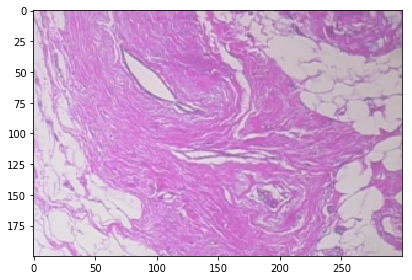

outer_i <class 'int'> 11
found fn SOB_B_F-14-25197-40-022.png at nested index [11] [0]


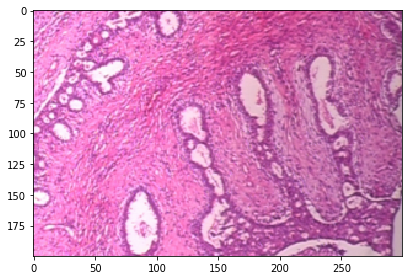

outer_i <class 'int'> 63
found fn SOB_M_LC-14-13412-40-001.png at nested index [63] [0]


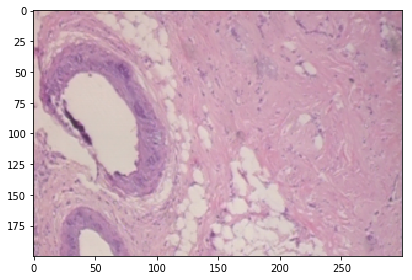

outer_i <class 'int'> 3
found fn SOB_B_A-14-29960CD-40-001.png at nested index [3] [0]


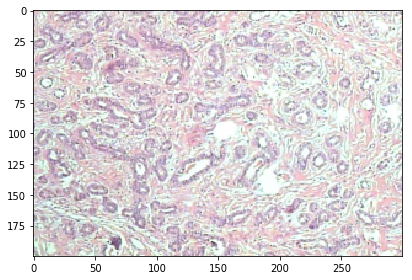

outer_i <class 'int'> 15
found fn SOB_B_PT-14-22704-40-001.png at nested index [15] [0]


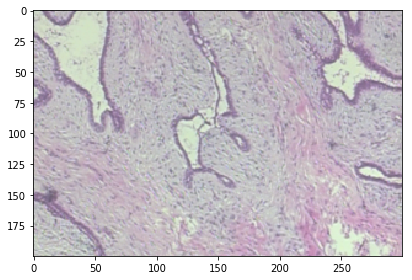

outer_i <class 'int'> 22
found fn SOB_B_TA-14-21978AB-40-001.png at nested index [22] [0]


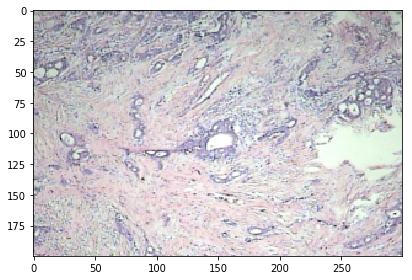

outer_i <class 'int'> 80
found fn SOB_M_PC-14-9146-40-001.png at nested index [80] [0]


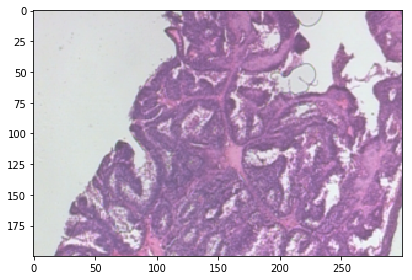

outer_i <class 'int'> 39
found fn SOB_M_DC-14-16448-40-001.png at nested index [39] [0]


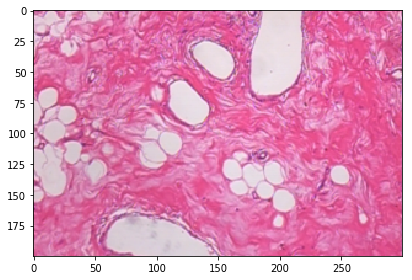

returning 8 sample images in list shape (200, 300, 3)
is same? {'MC': array([[[0.82228758, 0.75477124, 0.8148366 ],
        [0.86019608, 0.78568627, 0.86019608],
        [0.87058824, 0.80124183, 0.8824183 ],
        ...,
        [0.61738562, 0.47320261, 0.60045752],
        [0.65352941, 0.48764706, 0.63      ],
        [0.60771242, 0.45104575, 0.61738562]],

       [[0.8248366 , 0.75169935, 0.82594771],
        [0.86647059, 0.79196078, 0.87039216],
        [0.87464052, 0.80013072, 0.87862745],
        ...,
        [0.72928105, 0.58803922, 0.71477124],
        [0.65862745, 0.48627451, 0.63490196],
        [0.5969281 , 0.41803922, 0.59954248]],

       [[0.80098039, 0.72189542, 0.80882353],
        [0.87156863, 0.79215686, 0.87745098],
        [0.87352941, 0.80392157, 0.88006536],
        ...,
        [0.75849673, 0.62026144, 0.74313725],
        [0.65980392, 0.48529412, 0.64411765],
        [0.58921569, 0.42777778, 0.60065359]],

       ...,

       [[0.90163399, 0.88300654, 0.89542484]

In [11]:
imgs = ip.get_one_of_each()

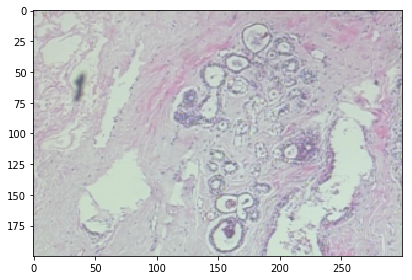

In [12]:
img1 = ip.get_image(0, 0)

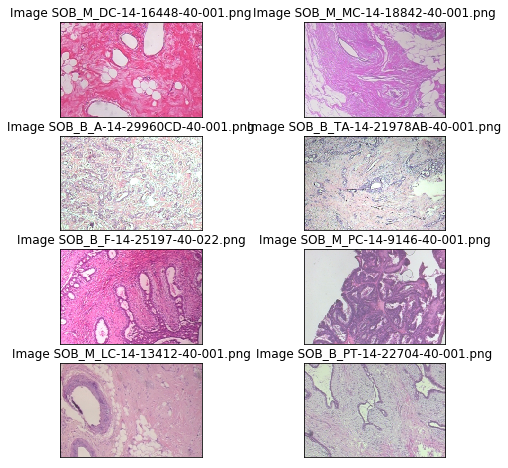

In [13]:
plot_images(imgs)

In [14]:
tumor_types = {'DC', 'LC', 'MC', 'PC', 'A', 'F', 'PT', 'TA'}

In [15]:
print('zip {}'.format(dict(zip(tumor_types, imgs))))

zip {'MC': 'SOB_M_DC-14-16448-40-001.png', 'F': 'SOB_M_MC-14-18842-40-001.png', 'PC': 'SOB_M_LC-14-13412-40-001.png', 'LC': 'SOB_B_A-14-29960CD-40-001.png', 'DC': 'SOB_B_PT-14-22704-40-001.png', 'A': 'SOB_B_TA-14-21978AB-40-001.png', 'PT': 'SOB_B_F-14-25197-40-022.png', 'TA': 'SOB_M_PC-14-9146-40-001.png'}
